# Clustering menggunakan k-Means

Notebook ini merupakan bagian dari buku **Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **BAB VIII - K-MEANS**

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score

## Data Understanding

In [2]:
# Membaca data
df = pd.read_csv(r'../datasets/mall-customers.csv')

In [3]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      200 non-null    int64 
 1   sex             200 non-null    object
 2   age             200 non-null    int64 
 3   annual-income   200 non-null    int64 
 4   spending-score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Statistik deskriptif
df.describe()

,customerID,age,annual-income,spending-score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Sampel data teratas
df.head()

,customerID,sex,age,annual-income,spending-score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Agregasi data berdasarkan jenis kelamin
pd.pivot_table(df, index='sex', aggfunc=np.mean)

,age,annual-income,customerID,spending-score
sex,,,,
Female,38.098214,59.250000,97.562500,51.526786
Male,39.806818,62.227273,104.238636,48.511364


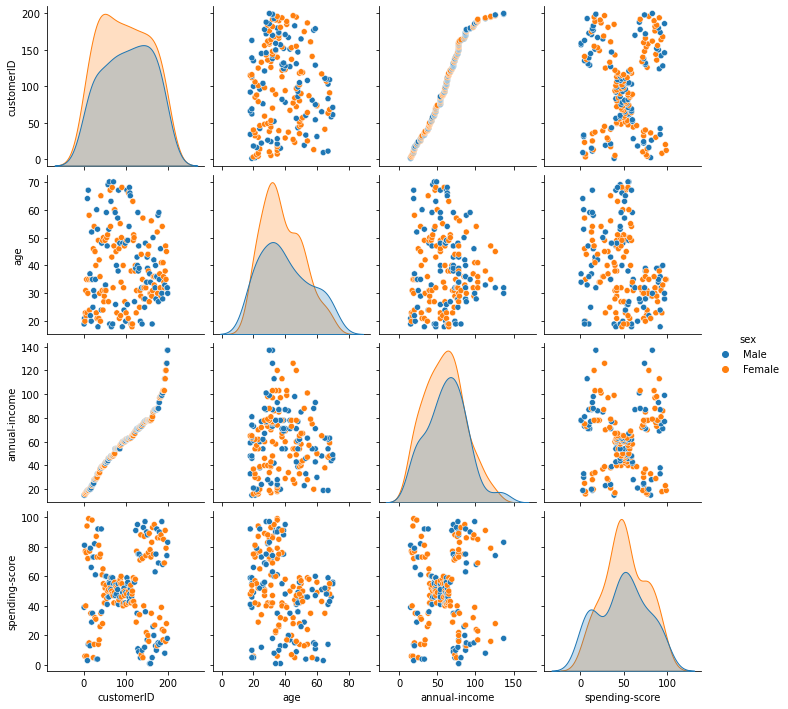

In [7]:
# Scatter plot dan KDE berdasarkan jenis kelamin
sns.pairplot(data=df, hue="sex")

## Data Preparation

In [8]:
# Memisahkan features
X = df.iloc[:, 3:5].values

Text(0, 0.5, 'WCSS')

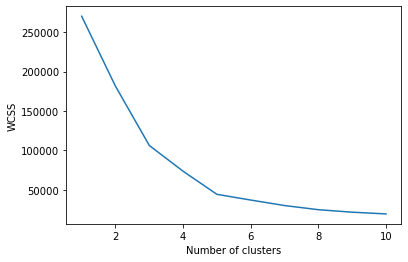

In [9]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Modelling

In [10]:
# Membuat model k-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

## Evaluation

In [11]:
# Melakukan prediksi cluster
y_pred = kmeans.predict(X)
y_center = kmeans.cluster_centers_

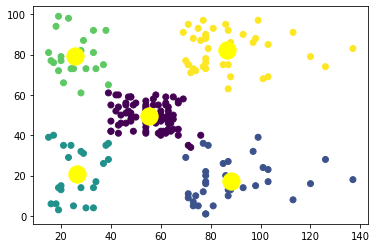

In [12]:
# Visualisasi cluster data
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.scatter(y_center[:, 0], y_center[:, 1], s=300, c='yellow')

In [13]:
# Metrik
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette score:", silhouette_score(X, y_pred))

Davies-Bouldin Index: 0.5725628995597081
Silhouette score: 0.553931997444648


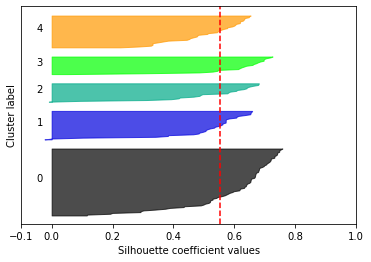

In [14]:
# Silhouette plot
n_clusters = 5
y_lower = 10

fig, ax1 = plt.subplots()
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

sample_silhouette_values = silhouette_samples(X, y_pred)
for i in range(n_clusters):
    s_sample = sample_silhouette_values[y_pred == i]
    s_sample.sort()

    size_cluster_i = s_sample.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, s_sample, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

silhouette_avg = silhouette_score(X, y_pred)
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
plt.show()